In [ ]:
## This cell just imports necessary modules
%pylab notebook
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting of Cylindrical and Spherical coordinates

# Lecture 1 (Coordinate Systems)

This notebook will illustrate how to apply the maths discussed in the lecture using Python.

In these notebooks, we will adopt the following prefix convention when naming variables:

```
's' (e.g. sDotProduct) means the variable is a scalar
'v' (e.g. vCrossProduct) means the variable is a vector
'm' (e.g. mA) means the variable is a matrix
```

To help us apply coordinate transformations, we start by writing a number of functions for each of the different changes of coordinate that we may wish to apply. Note that we could write each of these functions much more efficiently, but as we are quite new to Python we will err on the side of clarity. First, let's consider the function for converting from 2D Cartesian coordinates to Polar coordinates.

In [2]:
def cartesian_to_polar(vCoordinate):
    '''Converts 2D Cartesian coordinates to Polar coordinates.'''
    
    # Interpret input
    sX = vCoordinate[0] # The first component of the input vector is the x-coordinate
    sY = vCoordinate[1] # The second component of the input vector is the y-coordinate

    # Coordinate transform
    sR = sqrt(sX**2 + sY**2)     # Pythagoras' theorem
    sTheta = numpy.arctan(sY/sX) # Simple trigonometry: 'TOA', Tangent = opposite/adjacent
   
    # Remember: we might have to modify sTheta
    # depending on which 'quadrant' we are in.
    sTheta = check_angle(sX, sY, sTheta)
      
    return (sR, sTheta)

Notice that this function itself calls a function, because there will be circumstances when we need to resolve the ambiguity in the angle theta because the tangent fucntion repeats every 180 (or pi) degrees. Let's write a function `check_angle` to handle these situations.

In [3]:
def check_angle(sX, sY, sAngle):
    '''Adjust Polar coordinate angle based on quadrant, returning angle in
    radians between 0 and 2*pi.'''
    
    if(sX < 0 and sY >= 0):
        # We are in the upper left quadrant
        # so add 180 degrees (pi radians)
        # onto sAngle
        sAngle = sAngle + pi
    elif(sX < 0 and sY < 0):
        # We are in the lower left quadrant
        # so add 180 degrees (pi radians)
        # onto sAngle
        sAngle = sAngle + pi
    elif(sX >= 0 and sY < 0):
        # We are in the lower right quadrant
        # so add 360 degrees (2*pi radians)
        # onto sAngle
        sAngle = sAngle + 2*pi
     
    return sAngle

Now consider the reverse function that converts from Polar coordinates to 2D Cartesian.

In [4]:
def polar_to_cartesian(vCoordinate):
    '''A function to convert 2D Polar coordinates to Cartesian coordinates.'''

    # Interpret input
    sR = vCoordinate[0]
    sTheta = vCoordinate[1]
   
    # Coordinate transform
    sX = sR*cos(sTheta)
    sY = sR*sin(sTheta)
   
    return (sX, sY)

We can follow this same procedure to define the other functions we might need.

In [5]:
def cartesian_to_cylindrical(vCoordinate):
    '''Converts 3D Cartesian coordinates to Cylindrical coordinates.'''

    # Interpret input
    sX = vCoordinate[0]
    sY = vCoordinate[1]
    sZ = vCoordinate[2]
    
    # Coordinate transform
    sR = sqrt(sX**2 + sY**2)
    sPhi = numpy.arctan(sY/sX)
   
    # Again, check that we have the right value of sPhi
    # for the quadrant we are in.
    sPhi = check_angle(sX, sY, sPhi)
      
    return (sR, sPhi, sZ)
  
def cylindrical_to_cartesian(vCoordinate):
    '''Converts 3D Cylindrical coordinates to Cartesian coordinates.'''

    # Interpret input
    sR = vCoordinate[0]
    sPhi = vCoordinate[1]
    sZ = vCoordinate[2]

    # Coordinate transform
    sX = sR*cos(sPhi)
    sY = sR*sin(sPhi)
    sZ = sZ
   
    return (sX, sY, sZ)
   
def spherical_to_cartesian(vCoordinate):
    '''Converts 3D Cartesian coordinates to Spherical coordinates.'''

    # Interpret inputs
    sR = vCoordinate[0]
    sPhi = vCoordinate[1]
    sTheta = vCoordinate[2]
   
    # Coordinate transform
    sX = sR*sin(sTheta)*cos(sPhi)
    sY = sR*sin(sTheta)*sin(sPhi)
    sZ = sR*cos(sTheta)
   
    return (sX, sY, sZ)
      
def cartesian_to_spherical(vCoordinate):
    '''Converts 3D Spherical coordinates to Cartesian coordinates.'''

    # Interpret inputs
    sX = vCoordinate[0]
    sY = vCoordinate[1]
    sZ = vCoordinate[2]
   
    # Coordinate transform
    sR = sqrt(sX**2 + sY**2 + sZ**2)
    sPhi = numpy.arctan(sY/sX)
    sTheta = numpy.arccos(sZ/sR)
   
    # Again, check that we have the right value of sPhi
    # for the quadrant we are in.
    sPhi = check_angle(sX, sY, sPhi)

    return (sR, sPhi, sTheta)

Finally, we'll write a function to help us plot the coordinates for illustrative purposes. Don't worry about this function for now. 

In [11]:
def plot_coordinates(vCoordinate, xSystem="Cart2D", 
                       xlimits=[0.,1.], ylimits=[0.,1.], projection=False):
    '''Plots 2D or 3D coordinates of a point on formatted axes with the 
    option of showing the projection of the point onto the x-y-(z) axes.'''

    if (xSystem == 'Cart2D'):
        
        fig, ax = plt.subplots()

        # Set the spines to go through the origin
        ax.spines['left'].set_position(('data',0.))
        ax.spines['right'].set_color('none') # turn off the right spine/ticks
        ax.yaxis.tick_left()
        ax.spines['bottom'].set_position(('data',0.))
        ax.spines['top'].set_color('none') # turn off the top spine/ticks
        ax.xaxis.tick_bottom()
        ax.set_xlabel('x')
        ax.xaxis.set_label_coords(1.,0.475)
        ax.set_ylabel('y')
        ax.yaxis.set_label_coords(0.475,1.)
        ax.set_xlim(xlimits)
        ax.set_ylim(ylimits)
        
    elif (xSystem == 'Polar'):
        
        fig = pylab.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
        
    elif (xSystem == 'Cylindrical' or xSystem == 'Spherical'):
        
        fig = pylab.figure()
        ax = Axes3D(fig)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.plot([0.,1.2*vCoordinate[0]],[0.,0.],[0.,0.],'k-')
        ax.plot([0.,0.],[0.,1.2*vCoordinate[1]],[0.,0.],'k-')
        ax.plot([0.,0.],[0.,0.],[0.,1.2*vCoordinate[2]],'k-')
        [sX, sY, sZ] = vCoordinate

    # Plot the projections
    if (projection):
        if (xSystem == 'Cylindrical'):
            ax.plot([0.,sX],[0.,sY],[sZ,sZ],'b-',alpha=0.5)
            ax.plot([0.,sX],[0.,sY],[0.,0.],'k--',alpha=0.5)
            ax.plot([sX,sX],[sY,sY],[0.,sZ],'k:',alpha=0.5)
            ax.plot([sX],[sY],[0.],'ko',alpha=0.5)
        elif (xSystem == 'Spherical'):
            ax.plot([0.,sX],[0.,sY],[0.,sZ],'b-',alpha=0.5)
            ax.plot([0.,sX],[0.,sY],[0.,0.],'k--',alpha=0.5)
            ax.plot([sX,sX],[sY,sY],[0.,sZ],'k:',alpha=0.5)
            ax.plot([sX],[sY],[0.],'ko',alpha=0.5)
        else:
            ax.plot([0.,vCoordinate[0]],[0.,vCoordinate[1]],'b-',alpha=0.5)
            if (xSystem == 'Cart2D'):
                ax.plot([vCoordinate[0],vCoordinate[0]],[0.,vCoordinate[1]],'k--',alpha=0.5)
                ax.plot([0.,vCoordinate[0]],[vCoordinate[1],vCoordinate[1]],'k--',alpha=0.5)

    # Plot the point
    if (xSystem == 'Cylindrical' or xSystem == 'Spherical'):
        ax.plot([sX],[sY],[sZ],'ro')
    else:
        ax.plot(vCoordinate[0],vCoordinate[1],'ro')
        
    # Add a grid
    ax.grid(True)

## CARTESIAN COORDINATES
**Lecture 1, slide 3**

Right, so let's now utilise our functions to convert between different coordinate systems. Let's start by defining a point in 2D Cartesian coordinates and plotting the point.

Plotting  [-3.0, 4.0]


<IPython.core.display.Javascript object>


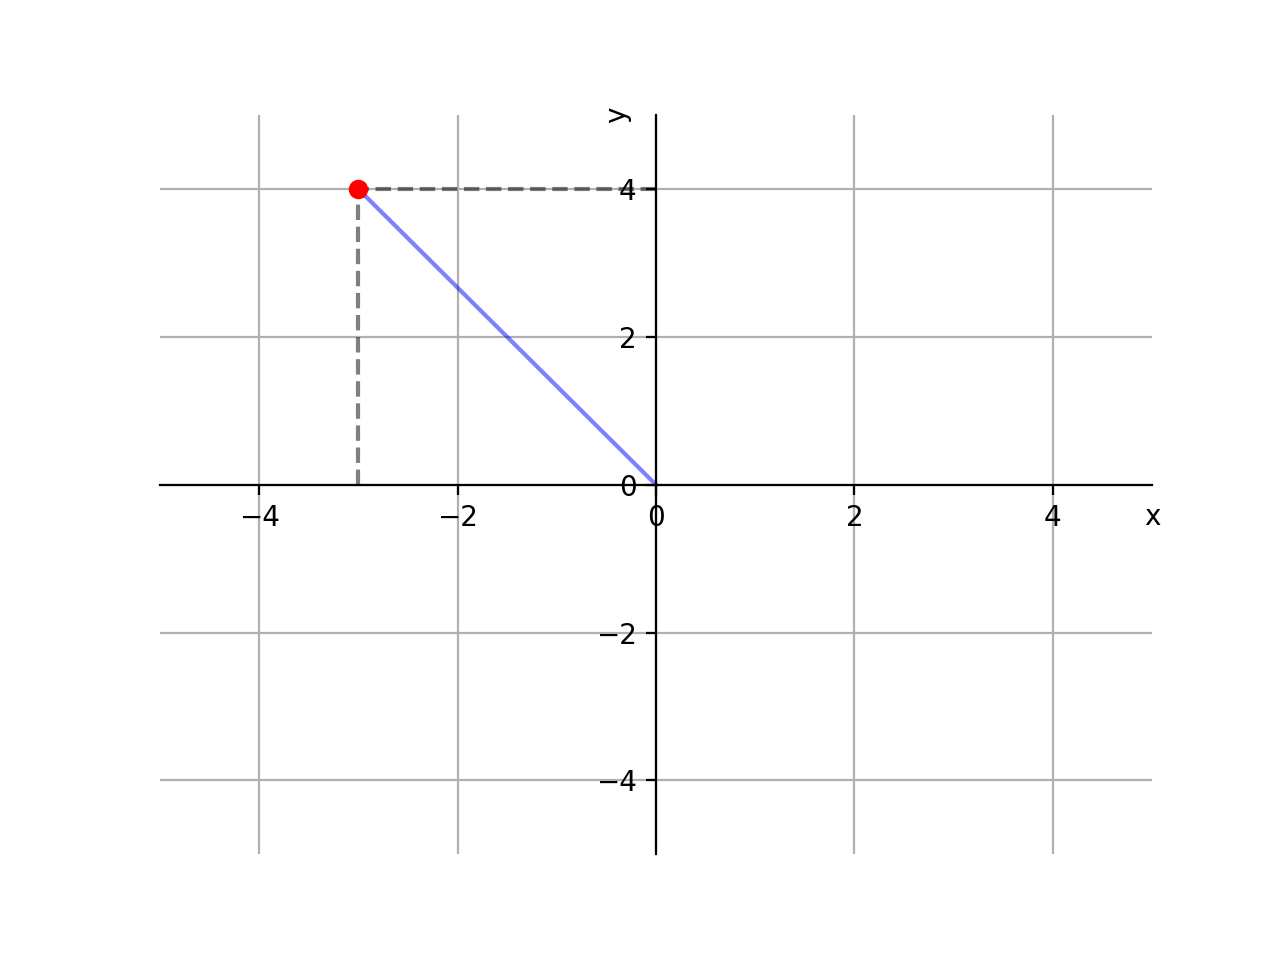

In [7]:
###### CARTESIAN COORDINATES ######
###### Lecture 1, slide 3 ######
# A Cartesian coordinate vector in the form (x, y).
vCoordinate = [-3.0, 4.0]

# Let's plot the above vCoordinate on the X-Y plane.
print("Plotting ", vCoordinate)
plot_coordinates(vCoordinate, xlimits=[-5,5], ylimits=[-5,5], projection=True)

## CARTESIAN TO POLAR CONVERSION
**Lecture 1, slide 4**

We can convert these coordinates to Polar coordinates using our function and plot on a Polar diagram.

Converting  [-3.0, 4.0]  to polar coordinates:
r = 5.000
theta = 2.214

Plotting  (5.0, 2.214297435588181)


<IPython.core.display.Javascript object>


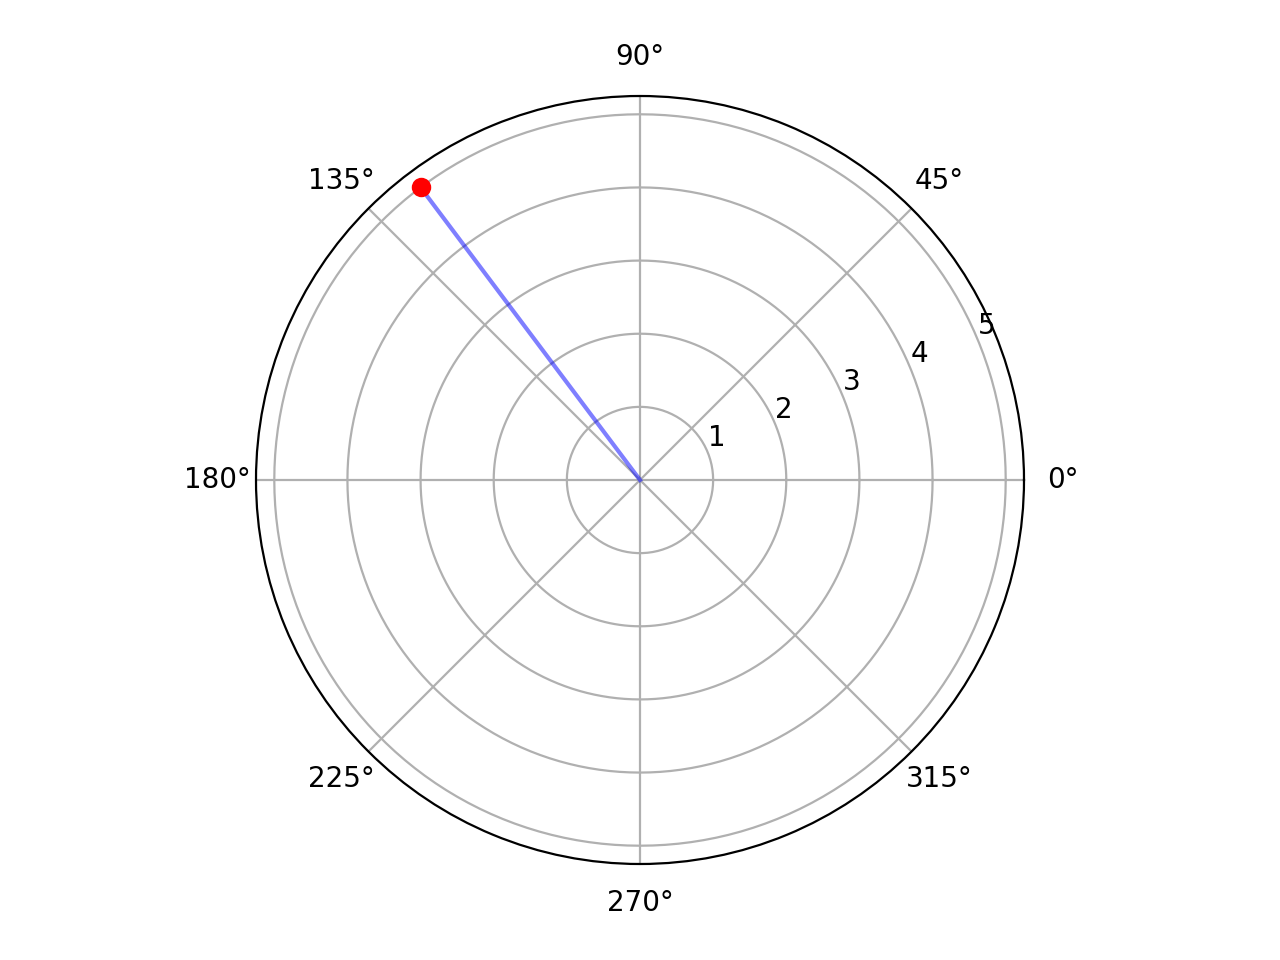

In [8]:
###### CARTESIAN TO POLAR CONVERSION ######
###### Lecture 1, slide 4 ######
(sR, sTheta) = cartesian_to_polar(vCoordinate)
print("Converting ", vCoordinate, " to polar coordinates:")
print("r = %.3f" % sR)
print("theta = %.3f\n" % sTheta) # Remember: theta will be in RADIANS

print("Plotting ", (sR, sTheta))
plot_coordinates([sTheta, sR], xSystem='Polar', projection=True)

# Plot r and theta.
#fig = pylab.figure()
#axes = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
#axes.plot(sTheta, sR, 'or')
#pylab.grid(True)

We can also convert the Polar coordinates back to Cartesian coordinates

In [9]:
###### POLAR TO CARTESIAN CONVERSION ######
###### Lecture 1, slide 4 ######
print("Converting r = %.2f, theta = %.2f back to Cartesian coordinates" % (sR, sTheta))
vCoordinate = [sR, sTheta]
(sX, sY) = polar_to_cartesian(vCoordinate)
print("x = %.2f" % sX)
print("y = %.2f" % sY)

Converting r = 5.00, theta = 2.21 back to Cartesian coordinates
x = -3.00
y = 4.00


## CYLINDRICAL COORDINATES
**Lecture 1, slide 7**

Plotting cylindrical coordinates  (1.94164878389476, 0.9685089806599324, 0.1)  in 3D Cartesian space


<IPython.core.display.Javascript object>


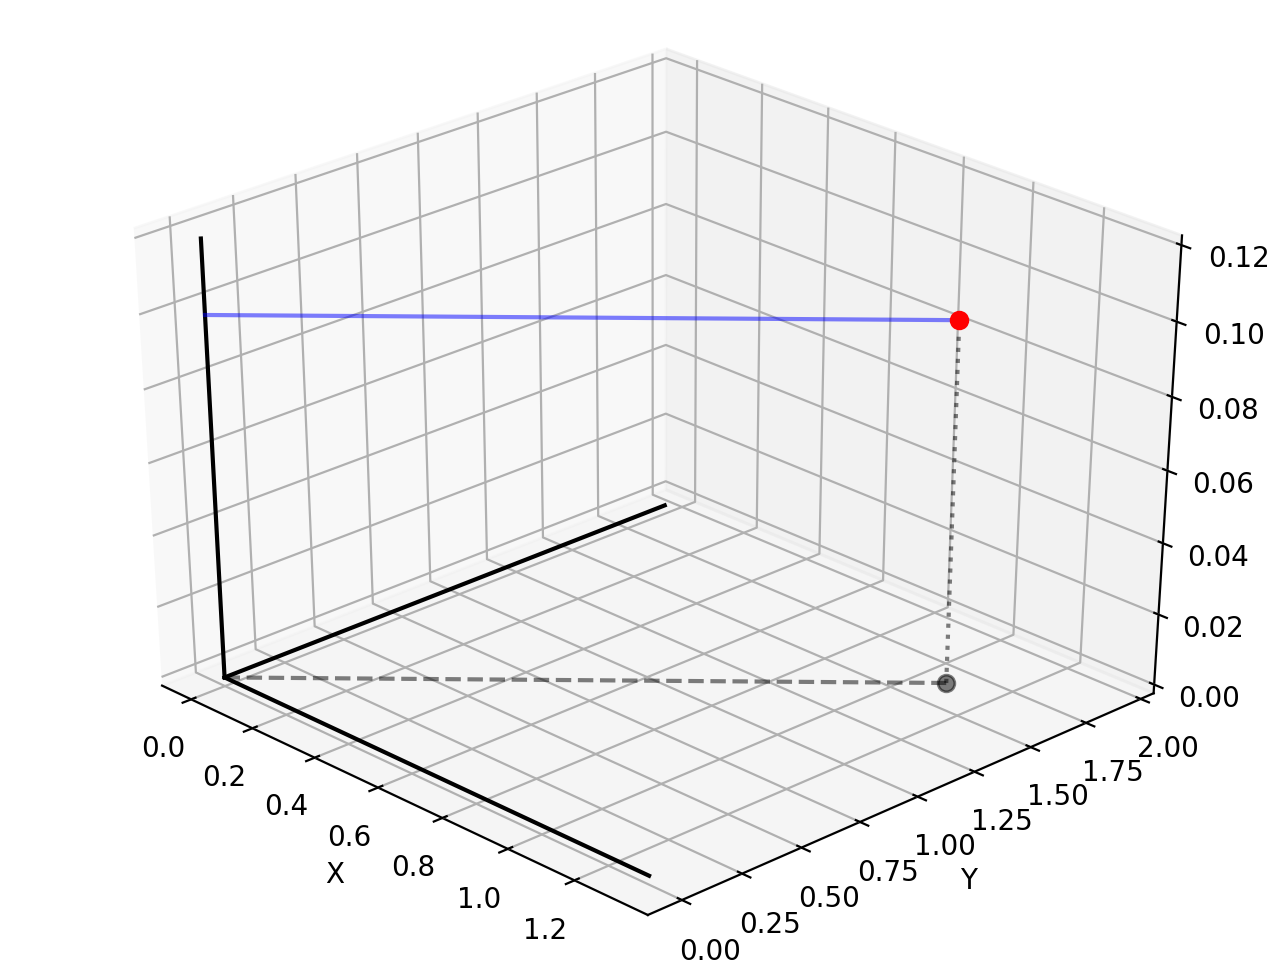

In [12]:
###### CYLINDRICAL COORDINATES ######
###### Lecture 1, slide 7 ######
vCoordinate = [1.1, 1.6, 0.1] # 3D Cartesian coordinate vector
# Convert to cylindrical coordinates (r, phi, z)
(sR, sPhi, sZ) = cartesian_to_cylindrical(vCoordinate)

print("Plotting cylindrical coordinates ", (sR, sPhi, sZ), " in 3D Cartesian space")
# Convert back to Cartesian for 3D plotting purposes
vCoordinate = [sR, sPhi, sZ]
(sX, sY, sZ) = cylindrical_to_cartesian(vCoordinate)

plot_coordinates([sX,sY,sZ], xSystem = 'Cylindrical', projection=True)

#fig = pylab.figure()        
#axes = Axes3D(fig)
#axes.plot([0.,sX],[0.,sY],[sZ,sZ],'b-')
#axes.plot([sX],[sY],[sZ],'or')
#axes.plot([0.,sX],[0.,sY],[0.,0.],'k--')
#axes.plot([sX,sX],[sY,sY],[0.,sZ],'k:')
#axes.plot([sX],[sY],[0.],'ok')
#axes.set_xlabel("X")
#axes.set_ylabel("Y")
#axes.set_zlabel("Z")

## SPHERICAL COORDINATES
**Lecture 1, slide 10**

Plotting spherical coordinates  (6400.0, 5.529203070318037, 1.9704767255015982)  in 3D Cartesian space


<IPython.core.display.Javascript object>


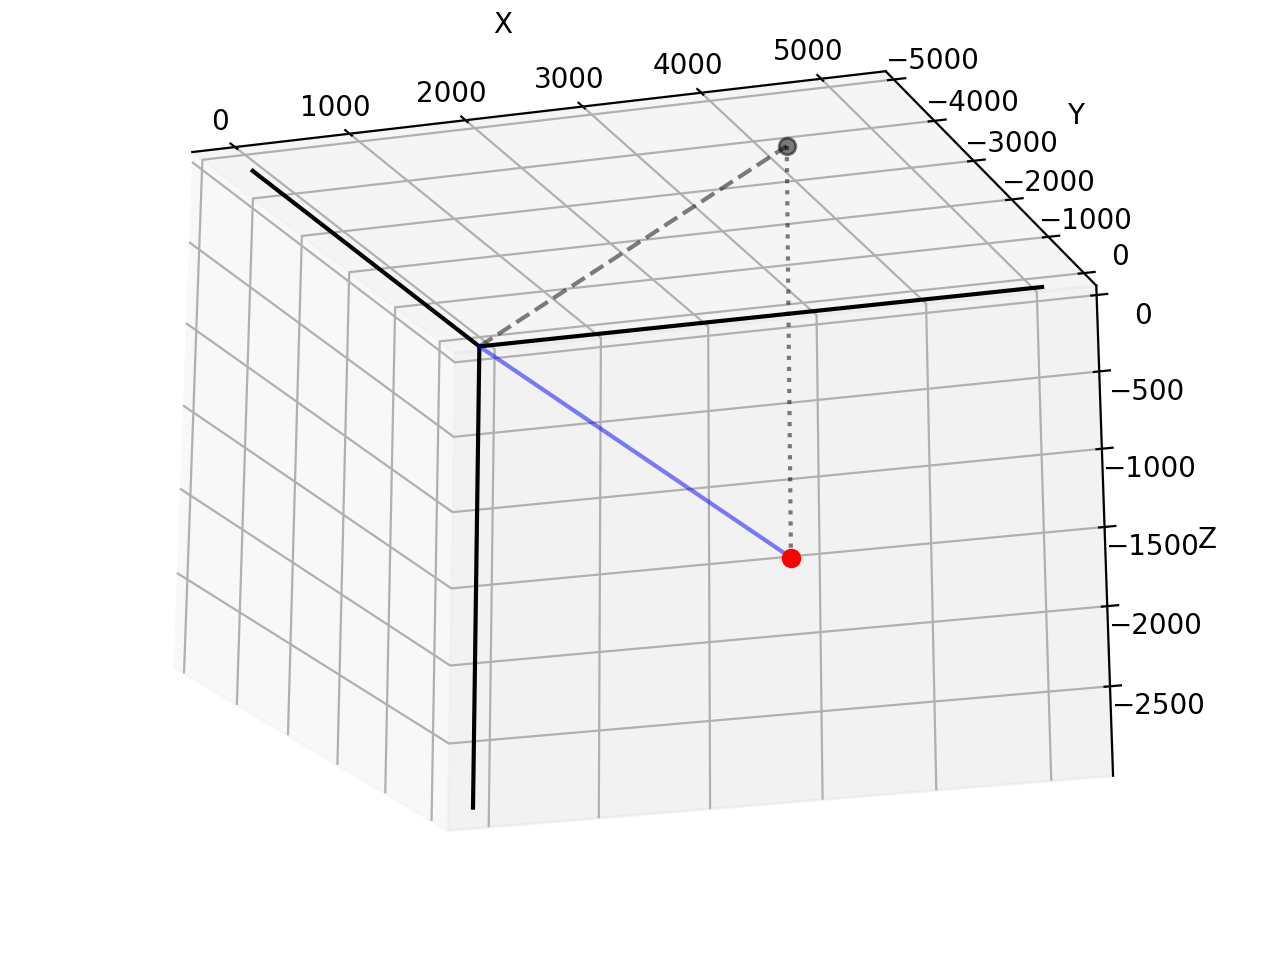

In [13]:
###### SPHERICAL COORDINATES ######
###### Lecture 1, slide 10 ######

# Let's define some spherical coordinates. . .
sR = 6400.0
# Convert angles in degrees to radians
sPhi = 316.8*(pi/180)
sTheta = 112.9*(pi/180)

print("Plotting spherical coordinates ", (sR, sPhi, sTheta), " in 3D Cartesian space")

# Convert back to Cartesian for 3D plotting purposes
vCoordinate = [sR, sPhi, sTheta]
(sX, sY, sZ) = spherical_to_cartesian(vCoordinate)

# Plot the 3D Cartesian coordinates 
plot_coordinates([sX,sY,sZ], xSystem = 'Spherical', projection=True)

#fig = pylab.figure()        
#axes = Axes3D(fig)
#axes.plot([0.],[0.],[0.],'oy')
#axes.plot([sX],[sY],[sZ],'or')
#axes.plot([0.,sX],[0.,sY],[0.,sZ],'b-')
#axes.plot([0.,sX],[0.,sY],[0.,0.],'k--')
#axes.plot([sX,sX],[sY,sY],[0.,sZ],'k:')
#axes.plot([sX],[sY],[0.],'ok')
#axes.set_xlabel("X")
#axes.set_ylabel("Y")
#axes.set_zlabel("Z")


## Final tip

So what did I mean when I said we could write these functions much more efficiently?

Well, let's try writing the first function again in as few lines as possible:

In [ ]:
def cartesian_to_polar(vC):
    '''Converts 2D Cartesian coordinates to Polar coordinates.'''
          
    return sqrt(vC[0]**2 + vC[1]**2), check_angle(vC[0], vC[1], numpy.arctan(vC[1]/vC[0]))

It turns out we can write this function in just one line of code, because there was no need to rename the input vector components as scalars and we can write the transformation formulae (and the `check_angle` function in the return statement.